In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('input/outbreaks.csv')
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [3]:
df['Status'].value_counts()

Status
Confirmed                                                                                                                                        7909
Suspected                                                                                                                                        4068
Suspected; Suspected                                                                                                                              310
Confirmed; Confirmed                                                                                                                              133
Confirmed; Suspected                                                                                                                               32
Confirmed; Confirmed; Confirmed                                                                                                                    17
Suspected; Confirmed                                                                         

/tmp/ipykernel_392/2283396129.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df.select_dtypes(include=np.object).columns:


<Figure size 1500x1000 with 0 Axes>

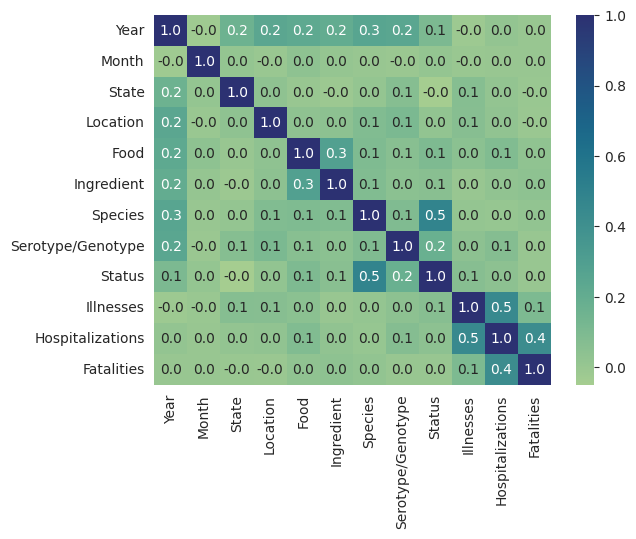

<Figure size 1500x1000 with 0 Axes>

In [4]:
df_encoded = df.copy()
for col in df.select_dtypes(include=np.object).columns:
    df_encoded[col] = pd.factorize(df[col])[0] + 1
sns.heatmap(data=df_encoded.corr(), annot=True, fmt='.1f', cmap='crest')
plt.figure(figsize=(15, 10))

In [5]:
len(df)

19119

In [6]:
df_correct_status = df.loc[df['Status'].isin(['Confirmed', 'Suspected'])]
len(df_correct_status)

11977

/tmp/ipykernel_392/3967599955.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in df_correct_status.select_dtypes(include=np.object).columns:


<Figure size 1500x1000 with 0 Axes>

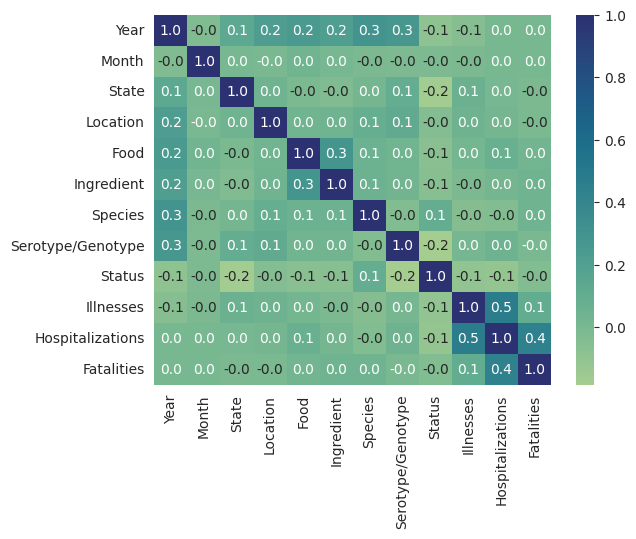

<Figure size 1500x1000 with 0 Axes>

In [7]:
df_encoded = df_correct_status.copy()
for col in df_correct_status.select_dtypes(include=np.object).columns:
    df_encoded[col] = pd.factorize(df_correct_status[col])[0] + 1
sns.heatmap(data=df_encoded.corr(), annot=True, fmt='.1f', cmap='crest')
plt.figure(figsize=(15, 10))

<Figure size 1000x500 with 0 Axes>

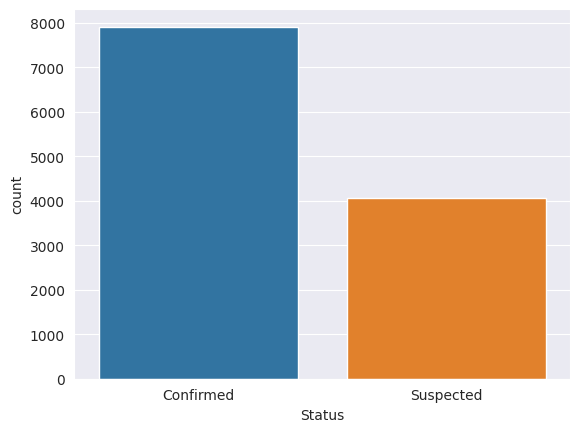

<Figure size 1000x500 with 0 Axes>

In [8]:
sns.countplot(data=df_correct_status, x='Status')
plt.figure(figsize=(10, 5))

In [9]:
values_with_nan = df_correct_status.isna().sum().sort_values(ascending=False)
values_with_nan = values_with_nan.where(values_with_nan > 0).dropna()
values_with_nan

Ingredient           10419.0
Serotype/Genotype     8210.0
Food                  5057.0
Hospitalizations      1761.0
Fatalities            1755.0
Location              1385.0
dtype: float64

In [10]:
from sklearn.impute import KNNImputer

df_len = len(df_correct_status)
for i, val in values_with_nan.items():
    if val > df_len/2:
        df_correct_status[i].fillna('Unknown', inplace=True)
    else:
        df_correct_status[i+'_isna'] = 0
        df_correct_status.loc[df_correct_status[i].isna(), i+'_isna'] = 1

        if df_correct_status.dtypes[i] != 'object':
            imputer = KNNImputer(n_neighbors=5)
            df_correct_status[i] = pd.DataFrame(imputer.fit_transform(df_correct_status[i].to_frame()), index=df_correct_status.index)
        else:
            df_correct_status[i].fillna(df_correct_status[i].mode()[0], inplace=True)


/tmp/ipykernel_392/96197220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[i].fillna('Unknown', inplace=True)
/tmp/ipykernel_392/96197220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[i+'_isna'] = 0
/tmp/ipykernel_392/96197220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[i].fillna(df_correct_status[i].mode()

In [11]:
values_with_nan = df_correct_status.isna().sum().sort_values(ascending=False)
values_with_nan = values_with_nan.where(values_with_nan > 0).dropna()
values_with_nan

Series([], dtype: float64)

In [12]:
df_correct_status.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities,Food_isna,Hospitalizations_isna,Fatalities_isna,Location_isna
3,1998,January,California,Restaurant,"Fish, Ahi",Unknown,Scombroid toxin,Unknown,Confirmed,4,0.000000,0.00000,0,0,0,0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Unknown,Salmonella enterica,Enteritidis,Confirmed,26,3.000000,0.00000,0,0,0,0
5,1998,January,California,Restaurant,"Oysters, Raw",Unknown,Shigella boydii,Unknown,Confirmed,25,3.000000,0.00000,1,0,0,0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Unknown,Salmonella enterica,Enteritidis,Confirmed,4,3.000000,0.00000,0,0,0,0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",Unknown,Virus,Unknown,Suspected,21,1.267717,0.02974,0,1,1,0


In [13]:
df_correct_status['Food'].unique()

array(['Fish, Ahi', 'Lasagna, Unspecified; Eggs, Other', 'Oysters, Raw',
       ..., 'Foie Gras', 'Cookies, Chocolate Chip', 'Gravy, Pork'],
      dtype=object)

In [14]:
all_food = []
for i, foods in df_correct_status['Food'].items():
    food_lst = foods.split('; ')
    for food in food_lst:
        if food not in set(all_food):
            all_food.append(food)
            df_correct_status[food] = 0
        df_correct_status.loc[i, food] = 1
df_correct_status.drop('Food', axis=1, inplace=True)

/tmp/ipykernel_392/2994290884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[food] = 0
/tmp/ipykernel_392/2994290884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[food] = 0
/tmp/ipykernel_392/2994290884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [15]:
df_correct_status[all_food].sum().sort_values(ascending=False)

Oysters, Raw                                     5208
Multiple Foods                                    148
Salad, Unspecified                                113
Potato Salad                                       99
Ground Beef, Hamburger                             89
                                                 ... 
Acai, Bananas, Strawberries, Sugar Cane Juice       1
Rice, Wild                                          1
Dill Dip                                            1
Raspberry Dressing                                  1
Foie Gras                                           1
Length: 1493, dtype: int64

In [16]:
df_correct_status['Species'].unique()

array(['Scombroid toxin', 'Salmonella enterica', 'Shigella boydii',
       'Virus', 'Clostridium perfringens', 'Norovirus genogroup I',
       'Staphylococcus aureus', 'Bacillus cereus',
       'Campylobacter unknown', 'Vibrio parahaemolyticus', 'Ciguatoxin',
       'Shigella flexneri', 'Hepatitis A', 'Shigella sonnei',
       'Yersinia enterocolitica', 'Streptococcus group A',
       'Norovirus genogroup II', 'Norovirus unknown', 'Bacterium',
       'Giardia intestinalis', 'Escherichia coli, Shiga toxin-producing',
       'Cyclospora cayatenensis', 'Escherichia coli, Enteropathogenic',
       'Chemical or toxin', 'Campylobacter jejuni',
       'Clostridium botulinum', 'Escherichia coli, Enterotoxigenic',
       'Mycotoxins', 'Pesticides', 'Vibrio cholerae',
       'Trichinella spiralis', 'Cryptosporidium parvum',
       'Listeria monocytogenes', 'Paralytic shellfish poison',
       'Vibrio other', 'Anisakis', 'Campylobacter other',
       'Vibrio unknown', 'Escherichia coli', 'Parasit

In [17]:
df_correct_status['Ingredient'].unique()

array(['Unknown', 'Egg', 'Chicken', 'Dry Cereal', 'Shellfish', 'Fin Fish',
       'Beef', 'Oysters, Raw', 'Oysters', 'Pork', 'Milk',
       'Fin Fish; Fin Fish', 'Cheese', 'Clams', 'Egg; Egg', 'Crustacean',
       'Chicken; Chicken', 'Leafy Green', 'Other Baked Goods',
       'Chicken; Pork', 'Beef; Legume', 'Cream Filling', 'Spices', 'Rice',
       'Egg; Egg; Egg', 'Egg; Beef', 'Sprouts',
       'Leafy Green; Vine-Stalk Eg. Tomato', 'Chicken; Chicken; Chicken',
       'Turkey', 'Fruit, Unspecified', 'Sauces/ Dressings',
       'Vine-Stalk Eg. Tomato; Spices', 'Water', 'Root (Eg. Potato)',
       'Bread', 'Cheese; Beef', 'Pasta', 'Fruit, Unspecified; Water',
       'Root (Eg. Potato); Root (Eg. Potato)', 'Leafy Green; Leafy Green',
       'Vine-Stalk Eg. Tomato', 'Beef; Pork',
       'Vine-Stalk Eg. Tomato; Cream Filling',
       'Leafy Green; Sauces/ Dressings', 'Beef; Sauces/ Dressings',
       'Legume', 'Beef; Legume; Chicken',
       'Cheese; Pork; Cheese; Pork; Turkey', 'Mussels',

In [18]:
all_ingredients = []
for i, ingredients in df_correct_status['Ingredient'].items():
    ingredient_lst = ingredients.split('; ')
    for ingredient in set(ingredient_lst):
        if ingredient not in all_ingredients:
            all_ingredients.append(ingredient)
            df_correct_status[ingredient] = 0
        df_correct_status.loc[i, ingredient] = 1
df_correct_status.drop('Ingredient', axis=1, inplace=True)

/tmp/ipykernel_392/1837422983.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_correct_status[ingredient] = 0
/tmp/ipykernel_392/1837422983.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_status[ingredient] = 0
/tmp/ipykernel_392/1837422983.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

In [19]:
df_correct_status[all_ingredients].sum().sort_values(ascending=False)

Unknown                      10419
Fin Fish                       186
Chicken                        165
Egg                            131
Beef                           127
                             ...  
Mesclun Mix                      1
Tofu                             1
Milk, 1% Milk Pasteurized        1
Conch                            1
Moringa Leaf Powder              1
Length: 197, dtype: int64

In [20]:
df_correct_status.head()

,Year,Month,State,Location,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities,...,Lobster,Dressing Mix,Juice,Banana,Oil,Basil,Parmesan Cheese,Yogurt,Chili Sauce,Moringa Leaf Powder
3,1998,January,California,Restaurant,Scombroid toxin,Unknown,Confirmed,4,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
4,1998,January,California,Private Home/Residence,Salmonella enterica,Enteritidis,Confirmed,26,3.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
5,1998,January,California,Restaurant,Shigella boydii,Unknown,Confirmed,25,3.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
7,1998,January,California,Restaurant,Salmonella enterica,Enteritidis,Confirmed,4,3.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
8,1998,January,Colorado,Restaurant,Virus,Unknown,Suspected,21,1.267717,0.02974,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import OneHotEncoder

df_oh = df_correct_status.copy()

df_oh['Month'] = pd.factorize(df_oh['Month'])[0] + 1
df_oh['Year'] = pd.factorize(df_oh['Year'])[0] + 1
df_oh['Status'].replace('Suspected', 0, inplace=True)
df_oh['Status'].replace('Confirmed', 1, inplace=True)

oh = OneHotEncoder()
data = pd.DataFrame(oh.fit_transform(df_oh.select_dtypes(include=np.object)).toarray(), columns=oh.get_feature_names_out(), index=df_oh.index)
df_oh = df_oh.join(data)
df_oh.drop(df_oh.select_dtypes(include=np.object).columns, axis=1, inplace=True)

df_oh.head()

/tmp/ipykernel_392/132766227.py:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.DataFrame(oh.fit_transform(df_oh.select_dtypes(include=np.object)).toarray(), columns=oh.get_feature_names_out(), index=df_oh.index)
/tmp/ipykernel_392/132766227.py:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_oh.drop(df_oh.select_dtypes(include=np.object).columns, axis=1, inplace=True)


,Year,Month,Status,Illnesses,Hospitalizations,Fatalities,Food_isna,Hospitalizations_isna,Fatalities_isna,Location_isna,...,Serotype/Genotype_Typhimurium var Cope,Serotype/Genotype_Uganda,Serotype/Genotype_Unknown,Serotype/Genotype_Urbana,Serotype/Genotype_Utah,Serotype/Genotype_Valdosta,Serotype/Genotype_Virchow,Serotype/Genotype_Weltevreden,Serotype/Genotype_Wimborne,Serotype/Genotype_subgroup D
3,1,1,1,4,0.000000,0.00000,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,26,3.000000,0.00000,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,1,25,3.000000,0.00000,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,4,3.000000,0.00000,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1,0,21,1.267717,0.02974,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

X = df_oh.drop('Status', axis=1)
y = df_oh['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
from catboost import CatBoostClassifier

model_cb = CatBoostClassifier()
model_cb.fit(X_train, y_train)
pred_cb = model_cb.predict(X_test)

Learning rate set to 0.027039
0:	learn: 0.6821751	total: 51.9ms	remaining: 51.8s
1:	learn: 0.6720674	total: 55.9ms	remaining: 27.9s
2:	learn: 0.6620146	total: 61.2ms	remaining: 20.3s
3:	learn: 0.6524751	total: 66.6ms	remaining: 16.6s
4:	learn: 0.6432756	total: 70.5ms	remaining: 14s
5:	learn: 0.6340177	total: 74.5ms	remaining: 12.3s
6:	learn: 0.6255260	total: 80.3ms	remaining: 11.4s
7:	learn: 0.6185712	total: 85.4ms	remaining: 10.6s
8:	learn: 0.6110557	total: 89.9ms	remaining: 9.9s
9:	learn: 0.6037611	total: 94.8ms	remaining: 9.38s
10:	learn: 0.5969863	total: 100ms	remaining: 9.01s
11:	learn: 0.5905701	total: 104ms	remaining: 8.57s
12:	learn: 0.5851950	total: 108ms	remaining: 8.18s
13:	learn: 0.5810162	total: 112ms	remaining: 7.87s
14:	learn: 0.5756310	total: 116ms	remaining: 7.62s
15:	learn: 0.5702003	total: 120ms	remaining: 7.38s
16:	learn: 0.5657482	total: 124ms	remaining: 7.19s
17:	learn: 0.5611341	total: 128ms	remaining: 6.97s
18:	learn: 0.5570387	total: 132ms	remaining: 6.82s
19:	

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       828
           1       0.83      0.92      0.87      1568

    accuracy                           0.83      2396
   macro avg       0.82      0.79      0.80      2396
weighted avg       0.83      0.83      0.82      2396



<Axes: >

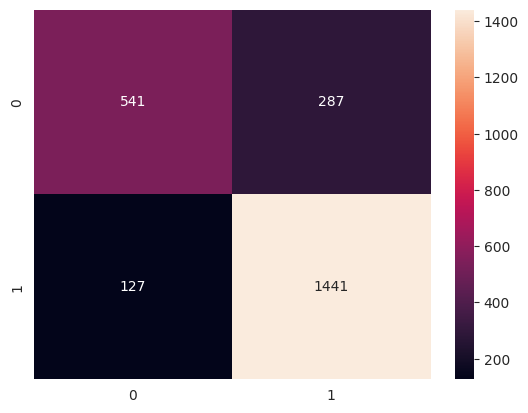

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_cb))
sns.heatmap(confusion_matrix(y_test, pred_cb), annot=True, fmt='.0f')

<Axes: ylabel='feature_names'>

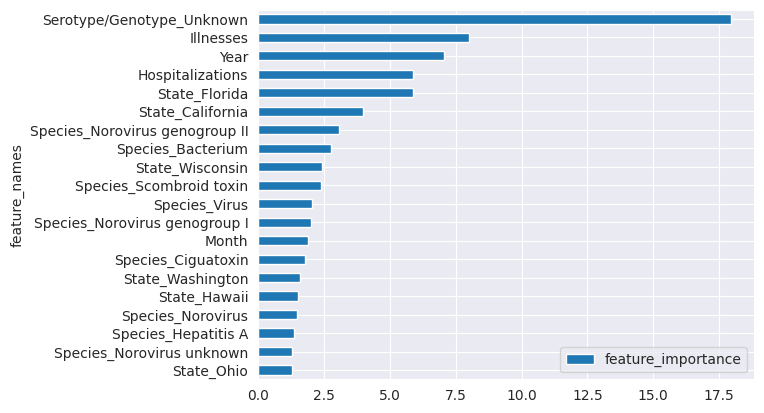

In [25]:
FI_cb = pd.DataFrame({'feature_importance': model_cb.get_feature_importance(),
              'feature_names': X_test.columns}).sort_values(by=['feature_importance'],
                                                       ascending=False)
FI_cb[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [26]:
from sklearn.svm import SVC

model_svc = SVC(C=0.5, kernel='linear')
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       828
           1       0.82      0.89      0.85      1568

    accuracy                           0.80      2396
   macro avg       0.78      0.76      0.77      2396
weighted avg       0.79      0.80      0.79      2396



<Axes: >

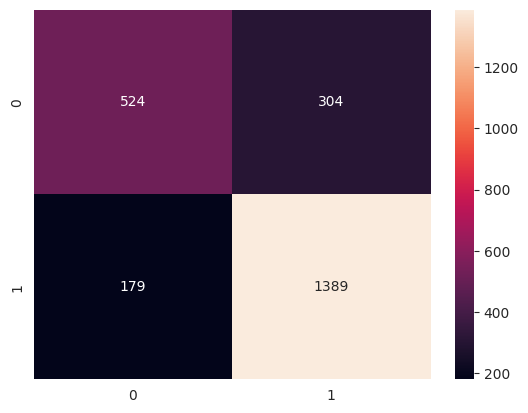

In [27]:
print(classification_report(y_test, pred_svc))
sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt='.0f')

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
sfs = SequentialFeatureSelector(model_lr, n_features_to_select=15, direction='backward', n_jobs=-1)
sfs.fit(X[FI_cb[:40].sort_values(by=['feature_importance'], ascending=True)['feature_names']], y)

/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=15, n_jobs=-1)

In [29]:
top_features = sfs.get_feature_names_out()
top_features

array(['Fatalities_isna', 'Species_Chemical or toxin', 'State_Illinois',
       'Species_Clostridium perfringens', 'Species_Staphylococcus aureus',
       'State_Washington', 'Species_Ciguatoxin', 'Species_Virus',
       'Species_Scombroid toxin', 'Species_Bacterium', 'State_California',
       'State_Florida', 'Hospitalizations', 'Illnesses',
       'Serotype/Genotype_Unknown'], dtype=object)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_lg_2 = LogisticRegression(penalty='l2', solver='liblinear')
pipeline1 = Pipeline([('scale', StandardScaler()), ('model', model_lg_2)])
pipeline1.fit(X_train[top_features], y_train)
pred_lg_2 = pipeline1.predict(X_test[top_features])

              precision    recall  f1-score   support

           0       0.73      0.55      0.63       828
           1       0.79      0.89      0.84      1568

    accuracy                           0.78      2396
   macro avg       0.76      0.72      0.73      2396
weighted avg       0.77      0.78      0.77      2396



<Axes: >

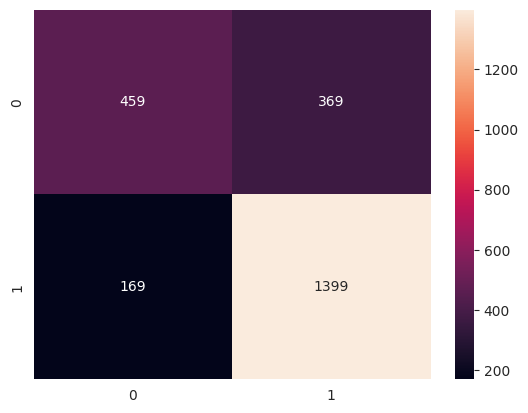

In [31]:
print(classification_report(y_test, pred_lg_2))
sns.heatmap(confusion_matrix(y_test, pred_lg_2), annot=True, fmt='.0f')

In [32]:
pipeline2 = Pipeline([('scale', StandardScaler()), ('model', CatBoostClassifier())])
pipeline2.fit(X_train[top_features], y_train)
pred_cb_2 = pipeline1.predict(X_test[top_features])

Learning rate set to 0.027039
0:	learn: 0.6819692	total: 2.14ms	remaining: 2.14s
1:	learn: 0.6703902	total: 3.95ms	remaining: 1.97s
2:	learn: 0.6611818	total: 5.54ms	remaining: 1.84s
3:	learn: 0.6511654	total: 7.22ms	remaining: 1.8s
4:	learn: 0.6416955	total: 8.89ms	remaining: 1.77s
5:	learn: 0.6326317	total: 11.3ms	remaining: 1.86s
6:	learn: 0.6244787	total: 12.9ms	remaining: 1.83s
7:	learn: 0.6159247	total: 14.7ms	remaining: 1.83s
8:	learn: 0.6087246	total: 16.7ms	remaining: 1.83s
9:	learn: 0.6018054	total: 18.3ms	remaining: 1.82s
10:	learn: 0.5951924	total: 20.1ms	remaining: 1.8s
11:	learn: 0.5888666	total: 21.9ms	remaining: 1.8s
12:	learn: 0.5827232	total: 24.4ms	remaining: 1.85s
13:	learn: 0.5772864	total: 26.8ms	remaining: 1.88s
14:	learn: 0.5724863	total: 28.9ms	remaining: 1.9s
15:	learn: 0.5677674	total: 30.7ms	remaining: 1.89s
16:	learn: 0.5635176	total: 32.8ms	remaining: 1.89s
17:	learn: 0.5591147	total: 35.5ms	remaining: 1.94s
18:	learn: 0.5550719	total: 37.2ms	remaining: 1.

              precision    recall  f1-score   support

           0       0.73      0.55      0.63       828
           1       0.79      0.89      0.84      1568

    accuracy                           0.78      2396
   macro avg       0.76      0.72      0.73      2396
weighted avg       0.77      0.78      0.77      2396



<Axes: >

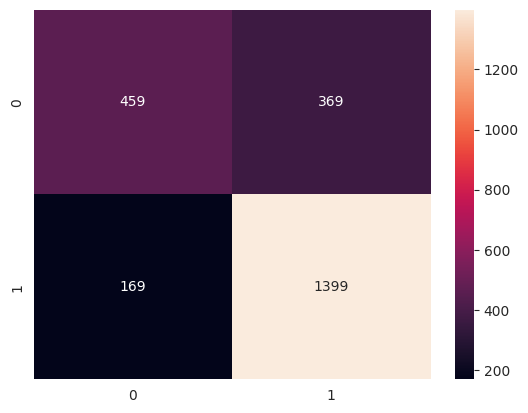

In [33]:
print(classification_report(y_test, pred_cb_2))
sns.heatmap(confusion_matrix(y_test, pred_cb_2), annot=True, fmt='.0f')